In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


## DATA COLLECTION

In [165]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [167]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## DATA CLEANING

In [168]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [169]:
df = df.drop('customerID', axis=1)

In [170]:
df.duplicated().sum()

22

In [171]:
df.drop_duplicates(inplace = True)

## Exploratory Data Analysis(EDA)

## Data Visualization

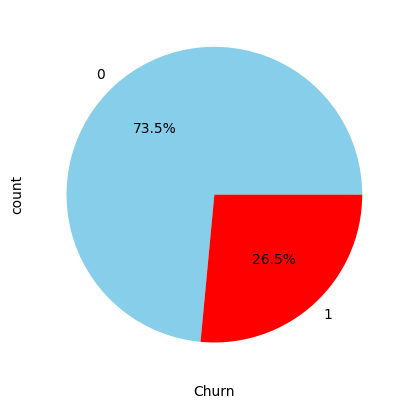

In [197]:
df['Churn'].value_counts().plot(kind = 'pie', autopct='%.1f%%', labels = df['Churn'].index, colors = ['skyblue','red'])
plt.xlabel('Churn')
plt.show()

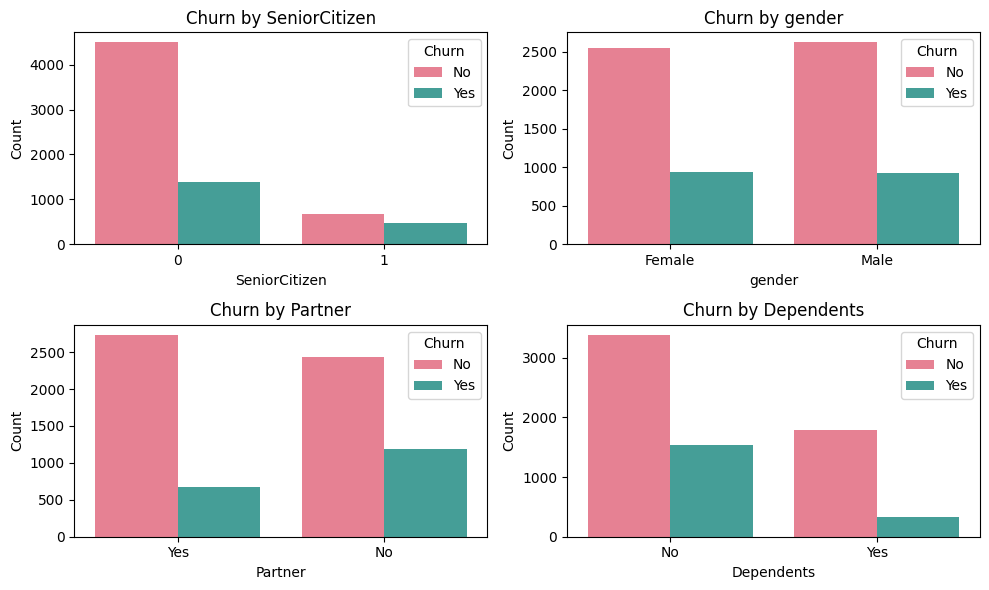

In [173]:
cust_info = ['SeniorCitizen', 'gender', 'Partner', 'Dependents']
plt.figure(figsize = (10,6))
for i, col in enumerate(cust_info, 1):
    plt.subplot(2,2,i)
    sns.countplot(x=col, hue = 'Churn', data = df, palette='husl')
    plt.title(f'Churn by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

<Axes: xlabel='tenure', ylabel='Count'>

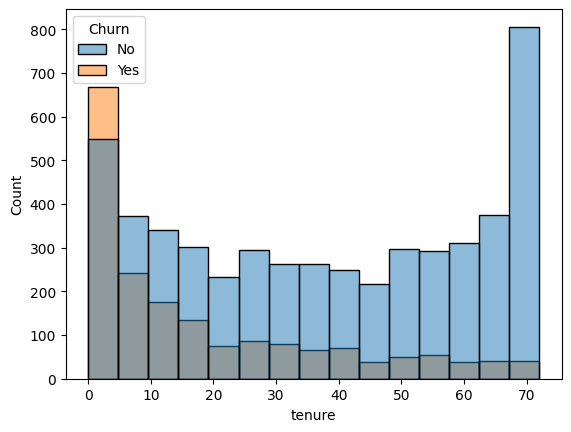

In [174]:
sns.histplot(x = df['tenure'], hue=df['Churn'])

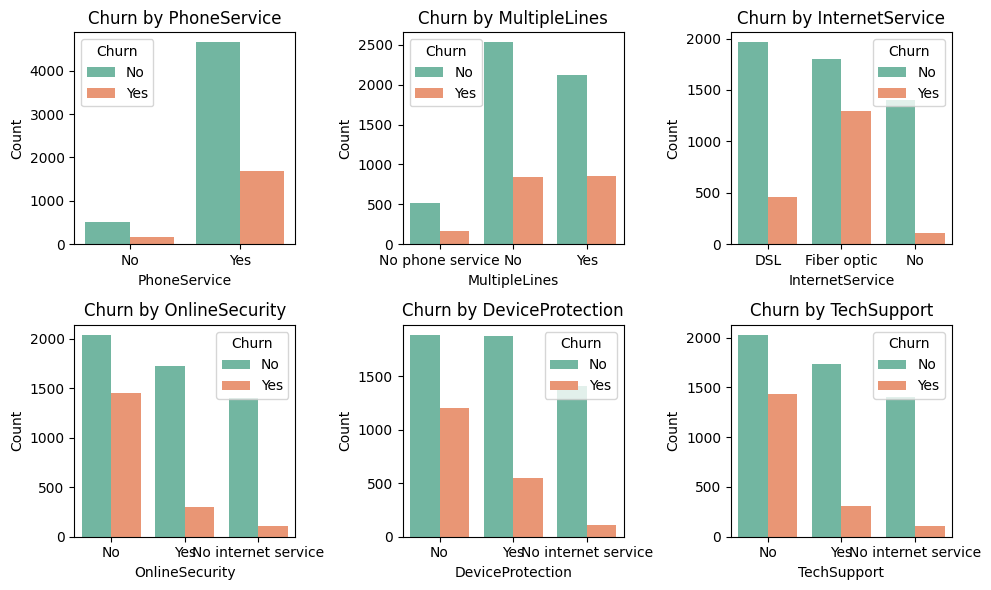

In [175]:
serv_cols = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','DeviceProtection','TechSupport']
plt.figure(figsize = (10,6))
for i, col in enumerate(serv_cols, 1):
    plt.subplot(2,3,i)
    sns.countplot(x=col, hue = 'Churn', data = df, palette=sns.color_palette("Set2"))
    plt.title(f'Churn by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

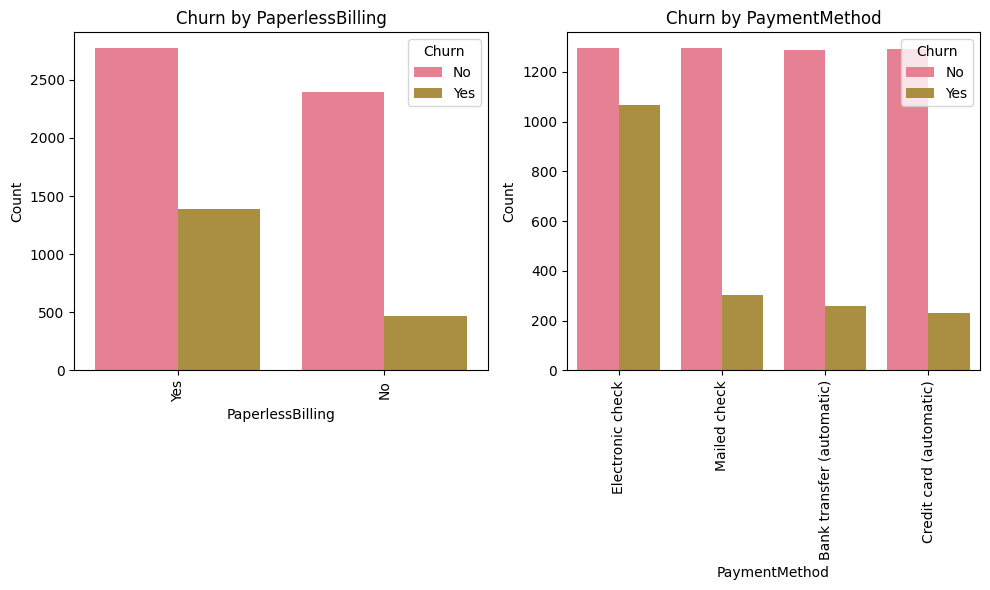

In [176]:
bill_cols = ['PaperlessBilling','PaymentMethod']
plt.figure(figsize = (10,6))
for i, col in enumerate(bill_cols, 1):
    plt.subplot(1,2,i)
    sns.countplot(x=col, hue = 'Churn', data = df, palette=sns.color_palette("husl"))
    plt.title(f'Churn by {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

## DATA PREPROCESSING AND FEATURE ENGINEERING

In [177]:
c = df.select_dtypes(include = ["object"]).columns
c

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [178]:
df[c] = df[c].astype('category') 

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7021 non-null   category
 1   SeniorCitizen     7021 non-null   int64   
 2   Partner           7021 non-null   category
 3   Dependents        7021 non-null   category
 4   tenure            7021 non-null   int64   
 5   PhoneService      7021 non-null   category
 6   MultipleLines     7021 non-null   category
 7   InternetService   7021 non-null   category
 8   OnlineSecurity    7021 non-null   category
 9   OnlineBackup      7021 non-null   category
 10  DeviceProtection  7021 non-null   category
 11  TechSupport       7021 non-null   category
 12  StreamingTV       7021 non-null   category
 13  StreamingMovies   7021 non-null   category
 14  Contract          7021 non-null   category
 15  PaperlessBilling  7021 non-null   category
 16  PaymentMethod     7021 non-nu

In [180]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [181]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [182]:
df.dropna(inplace = True)

In [183]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


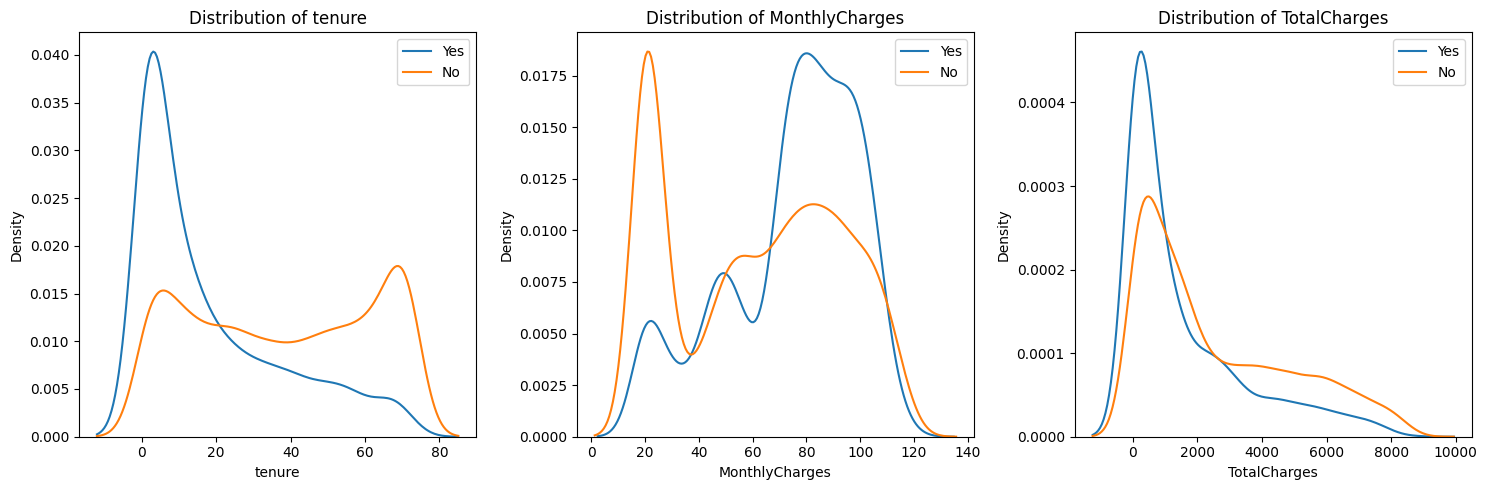

In [184]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges'], 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(df.loc[df['Churn'] == 'Yes', col], label='Yes')
    sns.kdeplot(df.loc[df['Churn'] == 'No', col], label='No')
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')
    plt.legend()
plt.tight_layout()
plt.show()

In [185]:
for column in c:
  values = df[column].unique()
  print(f"{column} column: {values}", end = '\n')

gender column: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Partner column: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Dependents column: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
PhoneService column: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
MultipleLines column: ['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']
InternetService column: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
OnlineSecurity column: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
OnlineBackup column: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
DeviceProtection column: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
TechSupport column: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
StreamingT

In [186]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

c = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies']

for col in c:
  df[col] = df[col].replace('No internet service', 'No')
    


### GRAPH TO SHOW RELATION BTW STREAMING AND CHURN

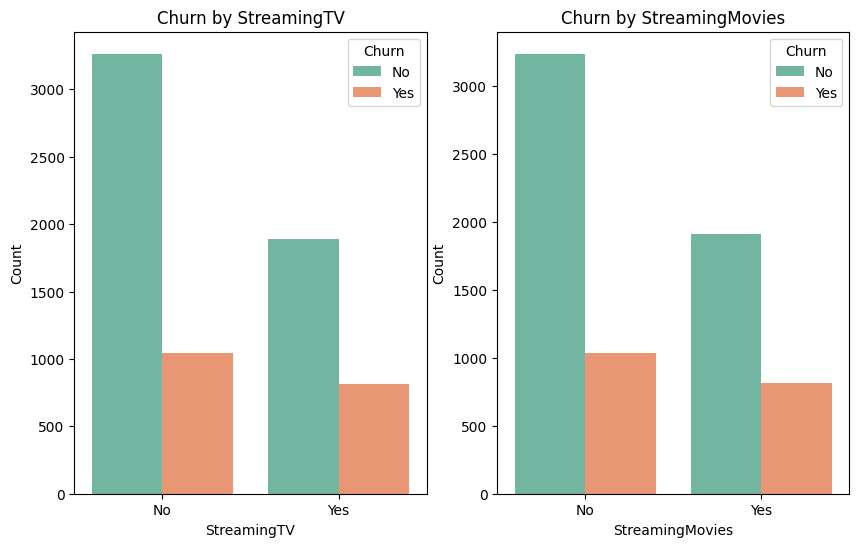

In [187]:
stream_cols = ['StreamingTV','StreamingMovies']
plt.figure(figsize = (10,6))
for i, col in enumerate(stream_cols, 1):
    plt.subplot(1,2,i)
    sns.countplot(x=col, hue = 'Churn', data = df, palette=sns.color_palette("Set2"))
    plt.title(f'Churn by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.show()

### MAPING COLUMN CATEGORIES

In [188]:
d = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity','OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in d:
  df[col] = df[col].map({"Yes": 1, "No":0})


df['gender'] = df['gender'].map({"Male": 1, "Female":0})
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


### MAPING THE COLUMN WITH NUMERICALS WHICH HAS MORE THAN 2 CATEGORIES

In [189]:
df['InternetService'] = df['InternetService'].map({"DSL": 1, 'Fibre optic':2, "No":3})
df['Contract'] = df['Contract'].map({"Month-to-month": 1, 'One year':2, "Two year":2})
df['PaymentMethod'] = df['PaymentMethod'].map({"Electronic check": 1, 'Mailed check':2, "Bank transfer (automatic)":3, "Credit card (automatic)":4})


In [190]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1.0,0,1,0,0,0,0,1,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1.0,1,0,1,0,0,0,2,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,1.0,1,1,0,0,0,0,1,1,2,53.85,108.15,1
3,1,0,0,0,45,0,0,1.0,1,0,1,1,0,0,2,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,0,NaN,0,0,0,0,0,0,1,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1.0,1,0,1,1,1,1,2,1,2,84.80,1990.50,0
7039,0,0,1,1,72,1,1,NaN,0,1,1,0,1,1,2,1,4,103.20,7362.90,0
7040,0,0,1,1,11,0,0,1.0,1,0,0,0,0,0,1,1,1,29.60,346.45,0
7041,1,1,1,0,4,1,1,NaN,0,0,0,0,0,0,1,1,2,74.40,306.60,1


In [191]:
df.isna().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService     3090
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [192]:
df['InternetService'].value_counts()

InternetService
1.0    2414
3.0    1506
Name: count, dtype: int64

In [193]:
df['InternetService'].fillna(df['InternetService'].mode()[0], inplace = True)

In [194]:
df['InternetService'] = df['InternetService'].astype('category')

### BOXPLOT TO DETECT OUTLIERS

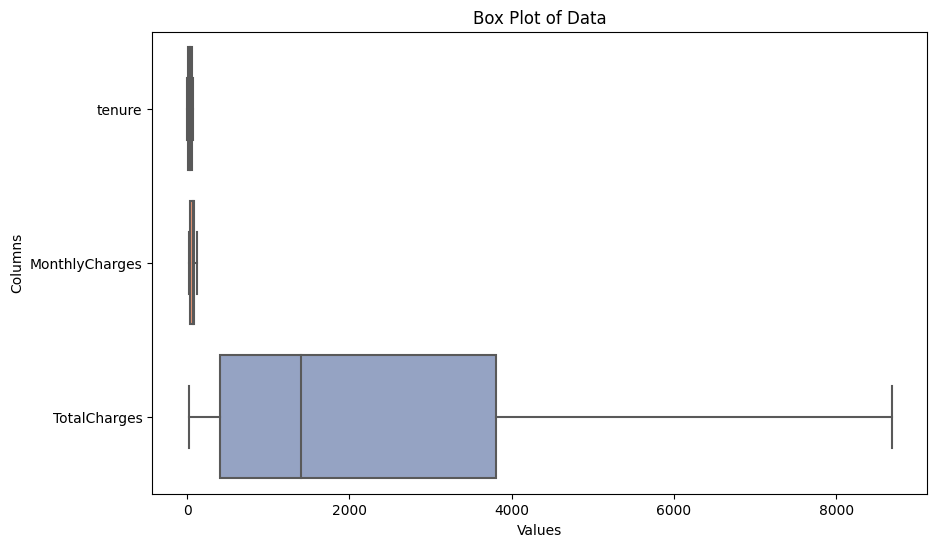

In [195]:
temp = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[temp], orient="h", palette="Set2")
plt.title("Box Plot of Data")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

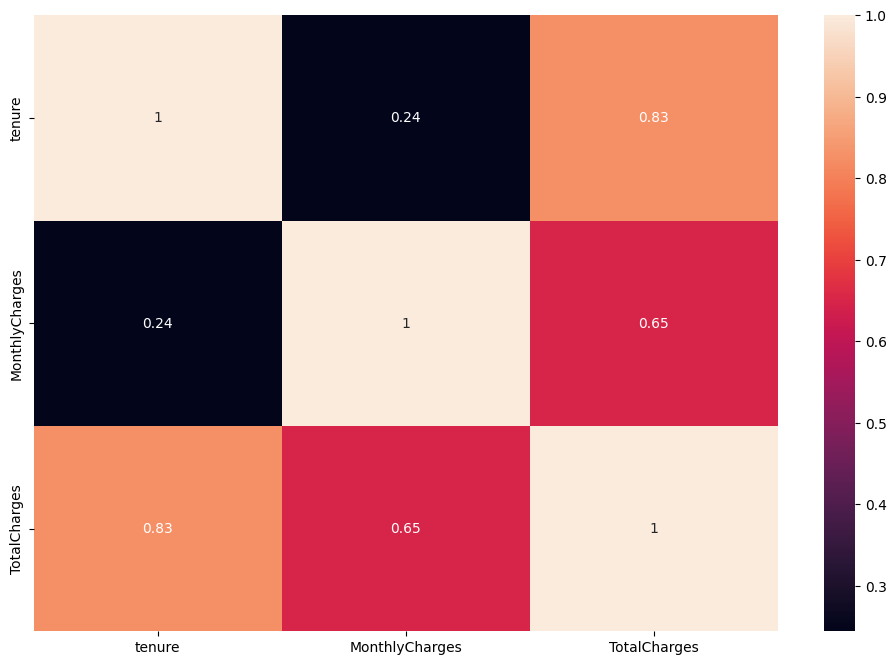

In [196]:
temp = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr_data = df[temp].corr()
plt.figure(figsize = [12, 8])
sns.heatmap(corr_data, annot = True)
plt.show()

### CONVERTING CATEGORY COLUMNS TO INT

In [58]:
t = df.select_dtypes(include = ['category']).columns

In [59]:
t = t.drop('Churn')

In [60]:
df[t] = df[t].astype('int')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7010 non-null   int32   
 1   SeniorCitizen     7010 non-null   int64   
 2   Partner           7010 non-null   int32   
 3   Dependents        7010 non-null   int32   
 4   tenure            7010 non-null   int64   
 5   PhoneService      7010 non-null   int32   
 6   MultipleLines     7010 non-null   int32   
 7   InternetService   7010 non-null   int32   
 8   OnlineSecurity    7010 non-null   int32   
 9   OnlineBackup      7010 non-null   int32   
 10  DeviceProtection  7010 non-null   int32   
 11  TechSupport       7010 non-null   int32   
 12  StreamingTV       7010 non-null   int32   
 13  StreamingMovies   7010 non-null   int32   
 14  Contract          7010 non-null   int64   
 15  PaperlessBilling  7010 non-null   int32   
 16  PaymentMethod     7010 non-nu

## SCALING THE DATA

In [62]:
num_cols = df.select_dtypes(include = ["float", "int"]).columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cols = scaler.fit_transform(df[num_cols])
train_scaled = pd.DataFrame(scaled_cols, columns = num_cols )
train_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.008596,-0.440921,1.032482,-0.653764,-1.285566,-3.051036,-0.856657,-0.523086,-0.635140,1.375035,-0.725650,-0.640674,-0.792201,-0.798895,-0.905186,0.828195,-1.145071,-1.165523,-0.997284
1,0.991477,-0.440921,-0.968540,-0.653764,0.060346,0.327757,-0.856657,-0.523086,1.574455,-0.727254,1.378075,-0.640674,-0.792201,-0.798895,1.104745,-1.207445,-0.275883,-0.264071,-0.176848
2,0.991477,-0.440921,-0.968540,-0.653764,-1.244781,0.327757,-0.856657,-0.523086,1.574455,1.375035,-0.725650,-0.640674,-0.792201,-0.798895,-0.905186,0.828195,-0.275883,-0.367189,-0.962740
3,0.991477,-0.440921,-0.968540,-0.653764,0.508983,-3.051036,-0.856657,-0.523086,1.574455,-0.727254,1.378075,1.560857,-0.792201,-0.798895,1.104745,-1.207445,0.593304,-0.751387,-0.198355
4,-1.008596,-0.440921,-0.968540,-0.653764,-1.244781,0.327757,-0.856657,-0.523086,-0.635140,-0.727254,-0.725650,-0.640674,-0.792201,-0.798895,-0.905186,0.828195,-1.145071,0.193308,-0.943549


## SPLITING THE DATA

In [64]:
x= train_scaled
y = pd.Series(df['Churn'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify = y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4907, 19), (2103, 19), (4907,), (2103,))

## MACHINE LEARNING MODEL BUILDING

In [104]:
lo_model = LogisticRegression()
lo_model.fit(x_train, y_train)
y_predict = lo_model.predict(x_test)

In [105]:
lo_accuracy = accuracy_score(y_predict, y_test)
lo_accuracy

0.8121730860675226

In [106]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1655
           1       0.55      0.68      0.61       448

    accuracy                           0.81      2103
   macro avg       0.73      0.76      0.74      2103
weighted avg       0.83      0.81      0.82      2103



In [107]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_model_predict = rf_model.predict(x_test)

In [108]:
rf_accuracy = accuracy_score(rf_model_predict, y_test)
rf_accuracy

0.7950546837850689

In [145]:
print(classification_report(rf_model_predict, y_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1709
           1       0.47      0.66      0.55       394

    accuracy                           0.80      2103
   macro avg       0.69      0.74      0.71      2103
weighted avg       0.83      0.80      0.81      2103



In [156]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

gradient_boosting.fit(x_train, y_train)

y_pred = gradient_boosting.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8031383737517832
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1546
           1       0.68      0.48      0.56       557

    accuracy                           0.80      2103
   macro avg       0.76      0.70      0.72      2103
weighted avg       0.79      0.80      0.79      2103

